In [1]:
!pip install imbalanced-learn


In [2]:
import pandas as pd
import numpy as np

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from imblearn.over_sampling import RandomOverSampler, SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.combine import SMOTEENN


In [4]:
data = pd.read_csv("/content/Creditcard_data.csv")
data.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
X = data.drop("Class", axis=1)
y = data["Class"]

print("Class distribution:")
print(y.value_counts())




Class distribution:
Class
0    763
1      9
Name: count, dtype: int64


In [6]:
scaler = StandardScaler()
X = scaler.fit_transform(X)


In [7]:
sampling_methods = {
    "Sampling1": RandomUnderSampler(random_state=42),
    "Sampling2": RandomOverSampler(random_state=42),
    "Sampling3": SMOTE(random_state=42),
    "Sampling4": SMOTEENN(random_state=42),
    "Sampling5": RandomOverSampler(sampling_strategy=0.75, random_state=42)
}


In [8]:
models = {
    "M1": LogisticRegression(max_iter=1000),
    "M2": DecisionTreeClassifier(),
    "M3": RandomForestClassifier(),
    "M4": GaussianNB(),
    "M5": SVC()
}


In [9]:
results = pd.DataFrame(index=models.keys(), columns=sampling_methods.keys())

for samp_name, sampler in sampling_methods.items():
    X_resampled, y_resampled = sampler.fit_resample(X, y)

    X_train, X_test, y_train, y_test = train_test_split(
        X_resampled, y_resampled, test_size=0.2, random_state=42
    )

    for model_name, model in models.items():
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        acc = accuracy_score(y_test, y_pred) * 100
        results.loc[model_name, samp_name] = round(acc, 2)


In [10]:
print("Accuracy Comparison Table (%)")
results



Accuracy Comparison Table (%)


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,25.0,93.14,93.14,93.52,91.76
M2,50.0,99.67,98.04,97.95,99.25
M3,0.0,100.0,99.35,100.0,100.0
M4,25.0,75.82,72.55,73.72,79.03
M5,0.0,96.08,96.73,99.66,97.75


In [13]:
for model in results.index:
    best_sampling = results.loc[model].astype(float).idxmax()
    best_acc = results.loc[model].max()
    print(f"{model} → {best_sampling} ({best_acc}%)")


M1 → Sampling4 (93.52%)
M2 → Sampling2 (99.67%)
M3 → Sampling2 (100.0%)
M4 → Sampling5 (79.03%)
M5 → Sampling4 (99.66%)


In [12]:
results


,Sampling1,Sampling2,Sampling3,Sampling4,Sampling5
M1,25.0,93.14,93.14,93.52,91.76
M2,50.0,99.67,98.04,97.95,99.25
M3,0.0,100.0,99.35,100.0,100.0
M4,25.0,75.82,72.55,73.72,79.03
M5,0.0,96.08,96.73,99.66,97.75


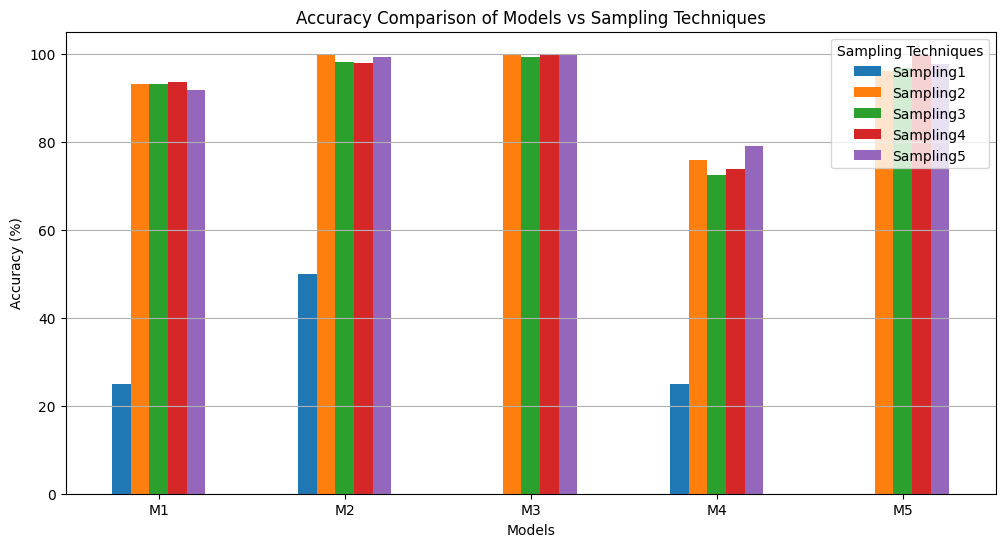

In [14]:
import matplotlib.pyplot as plt

results = results.astype(float)

results.plot(kind="bar", figsize=(12,6))
plt.title("Accuracy Comparison of Models vs Sampling Techniques")
plt.xlabel("Models")
plt.ylabel("Accuracy (%)")
plt.xticks(rotation=0)
plt.legend(title="Sampling Techniques")
plt.grid(axis='y')
plt.show()
